In [1]:
import os
import warnings

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from scipy.stats import ks_2samp
from synthesized.core import BasicSynthesizer
from synthesized.testing.synthetic_distributions import *
from synthesized.testing.synthetic_distributions import _plot_data

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2DF3-5D2D-B5F3
Expires at: 2019-06-30 00:00:00

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
def log_values(synthesizer):
    print(' ', 'value types:')
    for value in synthesizer.values:
        print(' ', value.name, value)
    print()

def log_distance(df_original, df_synthesized):
    distances = list()
    for name in df_original:
        distance = ks_2samp(df_original[name], df_synthesized[name]).statistic
        suffix = ''
        if distance < 0.05:
            suffix += '*'
        if distance < 0.01:
            suffix += '*'
        distances.append('{:.3f}{}'.format(distance, suffix))
    print('/'.join(distances), end='  ')

In [4]:
size = 100000

def synthesize(df_original, num_iterations, num_logging, fn_logging=log_distance, **kwargs):
    start = time.time()
    with BasicSynthesizer(df_original, **kwargs) as synthesizer:
        log_values(synthesizer)
        value_types = {value.name: type(value) for value in synthesizer.values}
        df_synthesized = synthesizer.synthesize(n=len(df_original))
        fn_logging(df_original, df_synthesized)
        for _ in range(num_iterations // num_logging):
            synthesizer.learn(data=df_original, num_iterations=num_logging)
            df_synthesized = synthesizer.synthesize(n=len(df_original))
            assert len(df_synthesized) == len(df_original)
            fn_logging(df_original, df_synthesized)
        print()
        print(' ', 'took', time.time() - start, 's')
        return synthesizer.synthesize(n=len(df_original)), value_types

def plot(data, synthesized, value_types):
#     distances = [ks_2samp(data[col], synthesized[col])[0] for col in data.columns]
#     avg_distance = np.mean(distances)
#     evaluation[name + '_avg_distance'] = avg_distance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('original')
    ax2.set_title('synthesized')
    _plot_data(data, ax=ax1, value_types=value_types)
    _plot_data(synthesized, ax=ax2, value_types=value_types)

### Bernoulli(0.3)

In [5]:
df_original = create_bernoulli(probability=0.3, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.08
)

hi
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
  value types:
  x categorical2-281

0.201  0.126  0.075  0.049*  0.045*  0.044*  0.040*  0.041*  0.040*  0.022*  0.034*  0.009**  0.009**  0.018*  0.012*  0.013*  0.020*  0.022*  0.014*  0.005**  0.005**  0.004**  0.017*  0.018*  0.015*  0.009**  0.016*  0.012*  0.010**  0.006**  0.007**  0.007**  0.011*  0.008**  0.002**  0.007**  0.004**  0.005**  0.005**  0.004**  0.002**  0.005**  0.001**  0.006**  0.001**  0.003**  0.000**  0.001**  0.002**  0.006**  0.001**  
  took 42.76071763038635 s


### Bernoulli(0.1)

In [6]:
df_original = create_bernoulli(probability=0.1, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.05
)

hi
  value types:
  x categorical2-281

0.282  0.172  0.098  0.046*  0.011*  0.012*  0.002**  0.005**  0.004**  0.000**  0.001**  0.001**  0.006**  0.010**  0.008**  0.006**  0.007**  0.008**  0.006**  0.007**  0.002**  0.002**  0.002**  0.001**  0.001**  0.003**  0.001**  0.003**  0.000**  0.006**  0.004**  0.007**  0.001**  0.006**  0.001**  0.000**  0.002**  0.002**  0.000**  0.006**  0.001**  0.003**  0.001**  0.001**  0.001**  0.001**  0.002**  0.002**  0.005**  0.004**  0.004**  
  took 42.84357261657715 s


### Categorical([0.5, 0.25, 0.125, ...])

In [7]:
df_original = create_categorical(probabilities=[0.5, 0.25, 0.125, 0.0625, 0.0625], size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.16
)

hi
  value types:
  x categorical5-458

0.301  0.212  0.138  0.088  0.074  0.073  0.060  0.053  0.055  0.058  0.049*  0.049*  0.043*  0.034*  0.042*  0.036*  0.030*  0.036*  0.030*  0.024*  0.018*  0.021*  0.016*  0.016*  0.022*  0.027*  0.020*  0.029*  0.023*  0.023*  0.032*  0.028*  0.028*  0.032*  0.034*  0.024*  0.030*  0.032*  0.029*  0.028*  0.028*  0.029*  0.027*  0.020*  0.030*  0.027*  0.029*  0.032*  0.026*  0.033*  0.026*  
  took 34.99243211746216 s


### Gaussian(0, 1)

In [5]:
df_original = create_1d_gaussian(mean=0.0, std=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0004),
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=50, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.1
)

hi
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
  value types:
  x continuous-normal

0.427  0.064  0.065  0.026*  0.052  0.039*  0.028*  0.046*  0.062  0.059  0.050  0.069  0.061  0.042*  0.043*  0.045*  0.046*  0.045*  0.042*  0.044*  0.042*  0.044*  0.042*  0.045*  0.045*  0.044*  0.043*  0.047*  0.046*  0.046*  0.048*  0.042*  0.048*  0.045*  0.047*  0.046*  0.048*  0.048*  0.047*  0.047*  0.044*  0.044*  0.044*  0.044*  0.046*  0.049*  0.047*  0.046*  0.048*  0.043*  0.047*  
  took 41.22711372375488 s


### Gaussian mixture N(0, 1) and N(3, 1)

Please note that fitting of distributions is not stable and for the same parameters of original distributuon we can get a different fitted distribution. We actually should not fit any distribution in this case. Shouldn't we decrease threshold for ditribution fitting?

In [104]:
df_original = create_two_gaussian_mixtures(mean1=0.0, std1=1.0, mean2=3.0, std2=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=4000, num_logging=400,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-5, # weight_decay=1e-5
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0005), # beta=0.0005
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=350, decay_rate=1.0, # learning_rate=1e-4, decay_steps=200
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.4 # entropy_regularization=0.0
)

hi
  value types:
  x continuous-raw

0.713  0.074  0.086  0.065  0.062  0.040*  0.057  0.043*  0.030*  0.044*  0.035*  
  took 130.08815455436707 s


### Production-like settings which sould produce reasonable result

In [14]:
df_original = create_two_gaussian_mixtures(mean1=0.0, std1=1.0, mean2=3.0, std2=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=5000, num_logging=500,
    # encoder/decoder
    network_type='mlp', capacity=128, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-5, # weight_decay=1e-5
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.001), # beta=0.0005
    # optimizer
    optimizer='adam', learning_rate=3e-4, decay_steps=200, decay_rate=0.5, # learning_rate=1e-4, decay_steps=200
    clip_gradients=1.0, batch_size=64,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.1 # entropy_regularization=0.0
)

hi
  value types:
  x continuous-normal

0.477  0.075  0.082  0.085  0.085  0.083  0.083  0.083  0.083  0.084  0.084  
  took 40.33580040931702 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1d9ebc048>]],
      dtype=object)

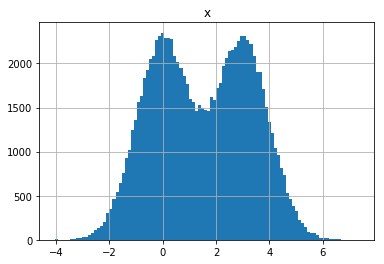

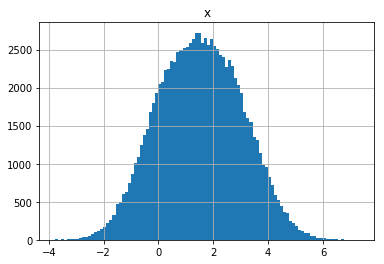

In [15]:
df_original.hist(bins=100)
df_synthesized.hist(bins=100)

### Bernoulli(0.1) x Bernoulli(0.1)

In [13]:
df_original = product(
    df1=create_bernoulli(probability=0.1, size=size),
    df2=create_bernoulli(probability=0.1, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.07
)

hi
  value types:
  x1 categorical2-281
  x2 categorical2-281

0.343/0.455  0.224/0.313  0.141/0.204  0.092/0.127  0.075/0.089  0.056/0.068  0.051/0.049*  0.052/0.048*  0.037*/0.048*  0.039*/0.043*  0.031*/0.035*  0.032*/0.039*  0.031*/0.035*  0.029*/0.031*  0.032*/0.024*  0.030*/0.020*  0.028*/0.010*  0.024*/0.007**  0.027*/0.007**  0.027*/0.009**  0.018*/0.011*  0.021*/0.005**  0.015*/0.009**  0.011*/0.016*  0.010**/0.005**  0.009**/0.008**  0.010*/0.010*  0.008**/0.006**  0.007**/0.002**  0.006**/0.004**  0.009**/0.009**  0.007**/0.001**  0.008**/0.003**  0.010*/0.003**  0.013*/0.004**  0.006**/0.004**  0.009**/0.004**  0.008**/0.001**  0.005**/0.002**  0.005**/0.002**  0.008**/0.004**  0.006**/0.001**  0.008**/0.000**  0.007**/0.001**  0.004**/0.004**  0.004**/0.001**  0.004**/0.000**  0.010*/0.001**  0.007**/0.003**  0.006**/0.001**  0.005**/0.002**  
  took 46.47533440589905 s


### Gaussian(1, 1) x Gaussian(-1, 1)

In [7]:
df_original = product(
    df1=create_1d_gaussian(mean=1.0, std=1.0, size=size),
    df2=create_1d_gaussian(mean=-1.0, std=1.0, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0004),
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=50, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.1
)

hi
  value types:
  x1 continuous-weibull
  x2 continuous-gamma

0.414/0.426  

/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.073/0.076  0.024*/0.018*  0.016*/0.045*  0.042*/0.038*  0.033*/0.052  0.043*/0.027*  0.050*/0.039*  0.026*/0.036*  0.030*/0.031*  0.052/0.040*  0.032*/0.039*  0.037*/0.053  0.039*/0.059  0.046*/0.048*  0.042*/0.046*  0.041*/0.041*  0.038*/0.042*  0.040*/0.041*  0.039*/0.038*  0.043*/0.039*  0.044*/0.040*  0.043*/0.045*  0.045*/0.045*  0.041*/0.048*  0.039*/0.045*  0.040*/0.048*  0.044*/0.046*  0.038*/0.043*  0.044*/0.045*  0.042*/0.049*  0.042*/0.043*  0.038*/0.042*  0.039*/0.040*  0.040*/0.044*  0.039*/0.042*  0.041*/0.045*  0.037*/0.042*  0.038*/0.042*  0.038*/0.044*  0.038*/0.048*  0.040*/0.049*  0.037*/0.040*  0.040*/0.042*  0.040*/0.043*  0.040*/0.045*  0.041*/0.045*  0.041*/0.041*  0.039*/0.046*  0.040*/0.047*  0.039*/0.041*  
  took 65.91362929344177 s


### Bernoulli x Gaussian

In [11]:
df_original = product(
    df1=create_bernoulli(probability=0.1, size=size),
    df2=create_1d_gaussian(mean=0.0, std=1.0, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.05
)

hi
  value types:
  x1 categorical2-281
  x2 continuous-normal

0.767/0.411  0.651/0.410  0.533/0.408  0.394/0.406  0.282/0.405  0.200/0.405  0.137/0.404  0.089/0.406  0.058/0.405  0.040*/0.406  0.018*/0.404  0.009**/0.406  0.005**/0.404  0.004**/0.406  0.009**/0.406  0.012*/0.403  0.015*/0.407  0.020*/0.404  0.024*/0.406  0.027*/0.405  0.027*/0.405  0.023*/0.405  0.027*/0.405  0.027*/0.402  0.031*/0.404  0.032*/0.407  0.028*/0.406  0.031*/0.405  0.029*/0.405  0.034*/0.404  0.034*/0.404  0.035*/0.403  0.031*/0.405  0.035*/0.407  0.037*/0.406  0.034*/0.406  0.037*/0.406  0.036*/0.405  0.033*/0.403  0.036*/0.406  0.035*/0.406  0.039*/0.405  0.035*/0.404  0.036*/0.406  0.035*/0.407  0.035*/0.406  0.034*/0.406  0.038*/0.407  0.038*/0.404  0.039*/0.405  0.038*/0.404  
  took 32.62858510017395 s
